# Clustering

  * In this task I have to deal with the issue of clustering.
 
## Data source
  * The data source is a file `CC GENERAL.csv` (original here: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata).

## Dataset description

  * The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
  * Following is the Data Dictionary for Credit Card dataset :
      * CUSTID : Identification of Credit Card holder (Categorical)
      * BALANCE : Balance amount left in their account to make purchases (
      * BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
      * PURCHASES : Amount of purchases made from account
      * ONEOFFPURCHASES : Maximum purchase amount done in one-go
      * INSTALLMENTSPURCHASES : Amount of purchase done in installment
      * CASHADVANCE : Cash in advance given by the user
      * PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
      * ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
      * PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
      * CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
      * CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
      * PURCHASESTRX : Number of purchase transactions made
      * CREDITLIMIT : Limit of Credit Card for user
      * PAYMENTS : Amount of Payment done by user
      * MINIMUM_PAYMENTS : Minimum amount of payments made by user
      * PRCFULLPAYMENT : Percent of full payment paid by user
      * TENURE : Tenure of credit card service for user

## Data: basic overview
* I will use the `pandas` package to load the data and do a basic exploration.

In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [2]:
import pandas as pd
import numpy as np

# suppress scientific float notation (so 0.000 is printed as 0.)
np.set_printoptions(precision=5, suppress=True)

In [3]:
data = pd.read_csv('CC GENERAL.csv')

In [4]:
print('data shape: ' + str(data.shape))
display(data.head())

data shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

None

In [6]:
display(data.describe())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
display(data.nunique())

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

## Data preparation


* When divided into clusters `CUST_ID` does not give information about account activity, so I will get rid of this feature. 

In [8]:
data = data.drop('CUST_ID', axis=1)

### Missing values

* I'll see how many missing values are in the dataset.

In [9]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

* Replacing the missing values with the mean value of the present data in that column where I've detected missing values.

In [10]:
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)

### Remove duplicates

* If there are duplicate data in the dataset, I remove it.

In [11]:
data = data.drop_duplicates()

## Custom implementation of the KMeans algorithm

* Method fit takes a dataset (data) as input and runs the KMeans algorithm to find clusters in the data.
* Next class is my custom implemenntation of the KMeans algorithm.

In [12]:
class custom_kmeans:

    def __init__ (self, n_clusters, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.cluster_centers = None
        self.labels = []
        self.func_val = 0

    def fit (self, data):
        np_data = data.values
        self.cluster_centers = np.array (data.sample(self.n_clusters, random_state=self.random_state).values)
        iteration = 0
        while iteration < self.max_iter + 1:
            clusters = {i: [] for i in range (self.n_clusters)}
            self.labels=[]
            distances = np.linalg.norm(np_data[ :, None, : ] - self.cluster_centers, 2, axis=2)
            cluster_indices = np.argmin(distances, axis=1)
            for i, cluster_index in enumerate (cluster_indices):
                clusters [cluster_index].append(np_data[i])
                self.labels.append(cluster_index)
            cluster_centers_new = np.array([np.mean(cluster, axis=0) for cluster in clusters.values( )])
            if np.allclose(cluster_centers_new, self.cluster_centers):
                break 
            else:
                self.cluster_centers = cluster_centers_new
            iteration += 1
        for id, cluster in clusters.items ( ):
            for c in cluster:
                self.func_val += np.linalg.norm(c - self.cluster_centers[id], 2)**2
            
    @property
    def centroids_ (self):
        return self.cluster_centers

    @property
    def labels_ (self):
        return self.labels

    @property
    def inertia_ (self):
        return self.func_val

In [13]:
from random import random
from random import seed

rd_seed = 47
num_clusters = 3

custom = custom_kmeans(num_clusters, random_state = rd_seed)
custom.fit(data)

In [14]:
# middles of resulting clusters
print('middles of resulting clusters: ' + str(custom.cluster_centers))

middles of resulting clusters: [[  855.06107     0.85422   603.00316   311.93663   291.3654    494.88869
      0.46749     0.15395     0.35227     0.10678     2.25322    10.6566
   2745.91534   996.33917   585.24796     0.15682    11.43282]
 [ 4797.20357     0.90847 10470.72366  7392.99015  3077.89769  5389.98332
      0.73738     0.58288     0.59293     0.22911     9.18657    83.79104
  12470.52239 17990.69494  2462.05952     0.3268     11.84328]
 [ 3390.34244     0.94091  1587.11921   992.0849    595.34613  2095.80332
      0.54084     0.31802     0.38566     0.2102      5.72953    22.18815
   8994.2964   2876.63456  1563.11666     0.13479    11.73824]]


### Clustering with the `sklearn.cluster.KMeans` implementation

In [15]:
from sklearn.cluster import KMeans

# Let's try 2 shucks first
k = 2
kmeans = KMeans(n_clusters = k, random_state = 1).fit(data)

# the resulting clusters
print('resulting clusters: ' + str(kmeans.labels_))
# and their middles
print('middles of resulting clusters: ' + str(kmeans.cluster_centers_))

resulting clusters: [1 0 1 ... 1 1 1]
middles of resulting clusters: [[3831.74174    0.93982 2364.99888 1551.49934  813.88269 2592.14186
     0.55766    0.34588    0.40581    0.22747    6.57892   28.00467
  9814.3845  4295.29635 1764.3984     0.14954   11.73832]
 [ 942.78404    0.86012  629.79718  329.45996  300.61466  536.50786
     0.4719     0.16313    0.35309    0.10983    2.33571   11.06435
  3035.70872 1030.59463  617.37147    0.15486   11.45672]]


In [16]:
# Same for the 3 clusters
k = 3
kmeans = KMeans(n_clusters = k, init = 'random', n_init = 1, random_state = rd_seed).fit(data)

# the resulting clusters
print('resulting clusters: ' + str(kmeans.labels_))
# and their middles
print('middles of resulting clusters: ' + str(kmeans.cluster_centers_))

resulting clusters: [0 2 2 ... 0 0 0]
middles of resulting clusters: [[  854.888       0.85404   601.96949   311.47573   290.79328   494.82996
      0.46705     0.15359     0.35212     0.1069      2.25623    10.64617
   2737.05319   995.93698   585.54238     0.1567     11.43191]
 [ 4797.20357     0.90847 10470.72366  7392.99015  3077.89769  5389.98332
      0.73738     0.58288     0.59293     0.22911     9.18657    83.79104
  12470.52239 17990.69494  2462.05952     0.3268     11.84328]
 [ 3375.46454     0.94089  1584.06615   989.26091   595.11518  2086.26621
      0.54166     0.31801     0.38588     0.20925     5.7        22.14762
   8981.38725  2866.37158  1556.36096     0.13526    11.73896]]


In [17]:
print('middles of resulting clusters KMeans from library: ' + str(kmeans.cluster_centers_))
print('middles of resulting clusters KMeans custom: ' + str(custom.cluster_centers))

middles of resulting clusters KMeans from library: [[  854.888       0.85404   601.96949   311.47573   290.79328   494.82996
      0.46705     0.15359     0.35212     0.1069      2.25623    10.64617
   2737.05319   995.93698   585.54238     0.1567     11.43191]
 [ 4797.20357     0.90847 10470.72366  7392.99015  3077.89769  5389.98332
      0.73738     0.58288     0.59293     0.22911     9.18657    83.79104
  12470.52239 17990.69494  2462.05952     0.3268     11.84328]
 [ 3375.46454     0.94089  1584.06615   989.26091   595.11518  2086.26621
      0.54166     0.31801     0.38588     0.20925     5.7        22.14762
   8981.38725  2866.37158  1556.36096     0.13526    11.73896]]
middles of resulting clusters KMeans custom: [[  855.06107     0.85422   603.00316   311.93663   291.3654    494.88869
      0.46749     0.15395     0.35227     0.10678     2.25322    10.6566
   2745.91534   996.33917   585.24796     0.15682    11.43282]
 [ 4797.20357     0.90847 10470.72366  7392.99015  3077.8976

* Centroids of the clusters almost matched, which means that the custom algorithm is valid.
  - The centers may not match because the initialization is randomized. 

### Determining the optimal value of $k$ for KMeans from library
* I'll display the value of the objective function of the dependence on $k$ and look for a breakpoint (elbow).

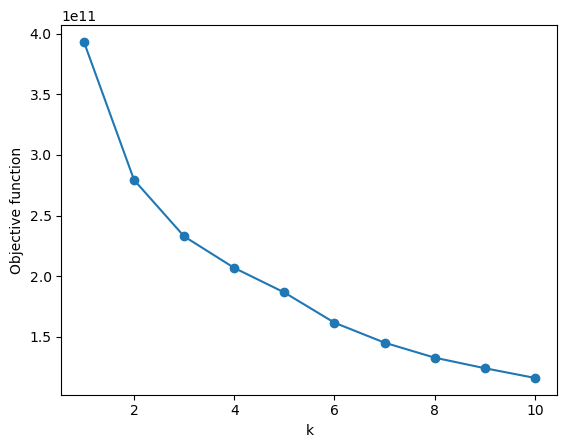

In [18]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

ix = np.zeros(10)
iy = np.zeros(10)
for k in range(ix.shape[0]):
    kmeans = KMeans(n_clusters=k+1, random_state = 1)
    kmeans.fit(data)
    iy[k] = kmeans.inertia_
    ix[k] = k+1

plt.xlabel('k')
plt.ylabel('Objective function')
plt.plot(ix, iy, 'o-')
plt.show()

* The optimal $k$ can therefore be detected as the value for which the decrease of the objective function changes from very steep to less steep, looking for the so-called elbow.
* Here, I would set `k = 3` as the optimum.  

### Determining the optimal value of $k$ for custom implementation

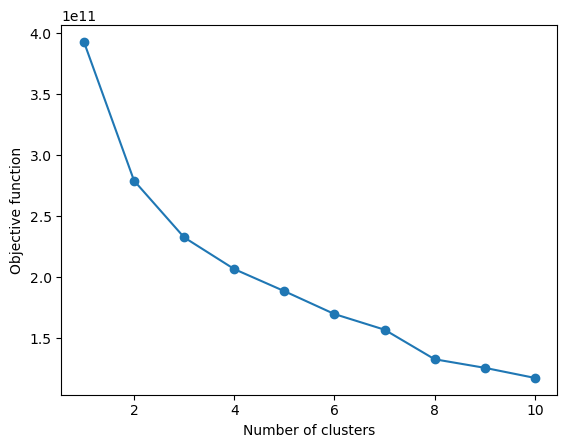

In [19]:
ix = np.zeros(10)
iy = np.zeros(10)
for k in range(ix.shape[0]):
    custom = custom_kmeans(n_clusters = k+1, random_state = rd_seed)
    custom.fit(data)
    iy[k] = custom.inertia_
    ix[k] = k+1

plt.xlabel("Number of clusters")
plt.ylabel("Objective function")
plt.plot(ix, iy, 'o-')
plt.show( )

* Here, I would set `k = 3` as the optimum.  

### Agglomerative herarchical clustering
* First I'll use the `scipy` library, specifically the `scipy.cluster.hierarchy` hierarchical clustering package.

#### Matice propojení
* To build it, I'll use the `linkage` function.
* The basic argument is the (distance) metric to be used for pairs of points.
    - the default is the Euclidean distance (`euclidean`)
* Another key argument is the choice of the method used to measure cluster distances.
* Now I'll use the nearest neighbour method - **single linkage** (`single`).

In [20]:
from scipy.cluster.hierarchy import linkage

# calculate the so-called interconnection matrix
Z = linkage(data, method="single", metric="euclidean")

# output dimensions
print('Output dimension is: ' + str(Z.shape))

Output dimension is: (8949, 4)


The output is a linkage matrix, in which each row corresponds to one cluster link to a new cluster. 

The columns are:
* index of the first cluster to be linked,
* the index of the second linked cluster,
* the distance between the linked clusters,
* the number of points that are in the newly created cluster.

In [21]:
# Let's look at the first 5 lines of Z
print(Z[:5,:])

[[5219.      8442.         4.84679    2.     ]
 [1131.      5928.         5.17391    2.     ]
 [ 181.      4401.         5.98212    2.     ]
 [8951.      8952.         8.65499    4.     ]
 [4185.      7366.        11.30959    2.     ]]


### Visualization of the cropped dendrogram
* I'll show only the upper part of the dendrogram where the last large clusters are merged.
* Using the `dendrogram` function

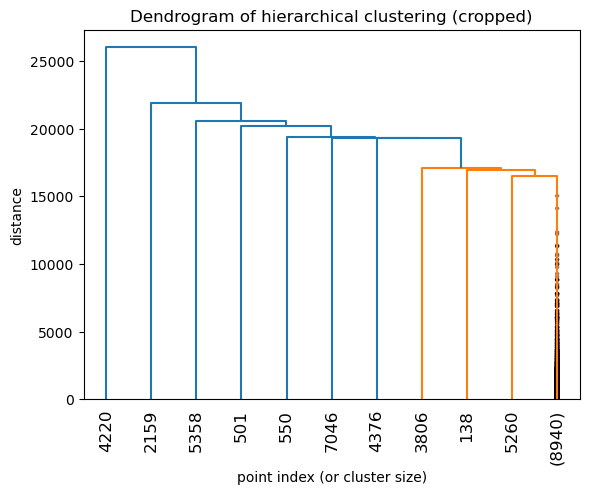

In [22]:
from scipy.cluster.hierarchy import dendrogram
import sys
sys.setrecursionlimit(10000)

plt.title("Dendrogram of hierarchical clustering (cropped)")
plt.xlabel("point index (or cluster size)")
plt.ylabel("distance")

dendrogram(
    Z,
    truncate_mode="lastp",  # Show only the last p connected clusters
    p=11,  # Setting this p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # helps the visual idea of joining leading to those cut clusters 
    # (dashes on lower vertical lines)
)

plt.show()

* the horizontal lines correspond to the connections of the clusters
* the vertical lines tell us which clusters are joining into a new cluster
* the heights (i.e. y-positions) of the horizontal lines correspond to the distance between the joining clusters

* I'll evaluate dendrogram using `cophenetic correlation`

In [23]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

pdistances = pdist(data, metric = "euclidean")
cophenet_coef = np.corrcoef(pdistances, cophenet(Z))[0,1]
print("Cophenetic correlation:", cophenet_coef)

Cophenetic correlation: 0.8712619179374058


As a result, we have a cluster containing all but one point and a cluster containing one point. There is no sense in even counting the cophenetic coefficient, this linkage algorithm is not good for this dataset.

#### Changes in hyperparameters of Agglomerative herarchical clustering
* I'll try linkage algorithm `ward`

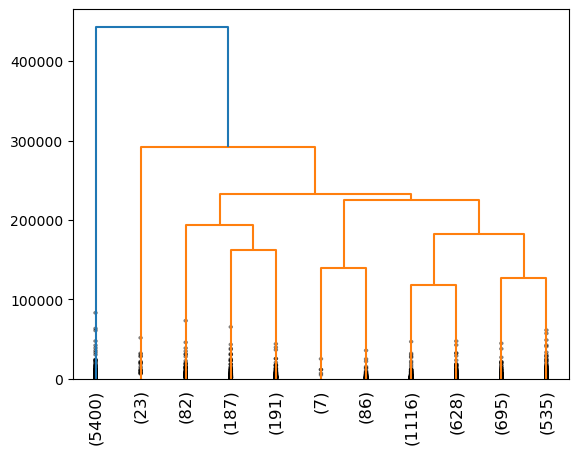

In [24]:
Z2 = linkage(data, method="ward", metric="euclidean")

dendrogram(
    Z2,
    truncate_mode="lastp",  # Show only the last p connected clusters
    p=11,  # Setting this p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # helps the visual idea of joining leading to those cut clusters 
    # (dashes on lower vertical lines)
)

plt.show()

In [25]:
pdistances = pdist(data, metric = "euclidean")
cophenet_coef = np.corrcoef(pdistances, cophenet(Z2))[0,1]
print("Cophenetic correlation:", cophenet_coef)

Cophenetic correlation: 0.44393355645922844


* I'll try linkage algorithm `complete`

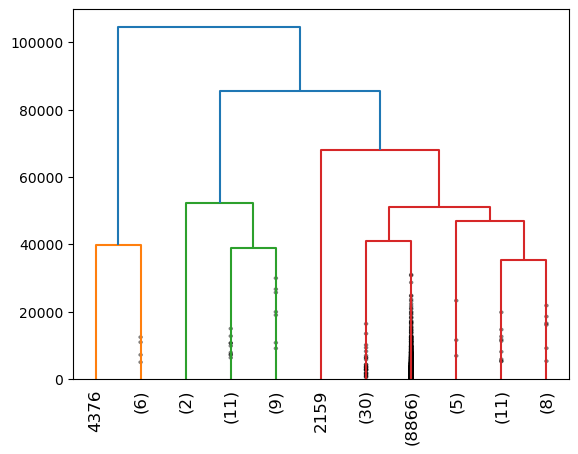

In [26]:
Z3 = linkage(data, method="complete", metric="euclidean")

dendrogram(
    Z3,
    truncate_mode="lastp",  
    p=11,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)

plt.show()

In [27]:
pdistances = pdist(data, metric = "euclidean")
cophenet_coef = np.corrcoef(pdistances, cophenet(Z3))[0,1]
print("Cophenetic correlation:", cophenet_coef)

Cophenetic correlation: 0.7959131949511853


The same situation as it was with method="single".

> As a result, we have a cluster containing all but one point and a cluster containing one point. There is no sense in even counting the cophenetic coefficient, this linkage algorithm is not good for this dataset.

* I'll try linkage algorithm `average`

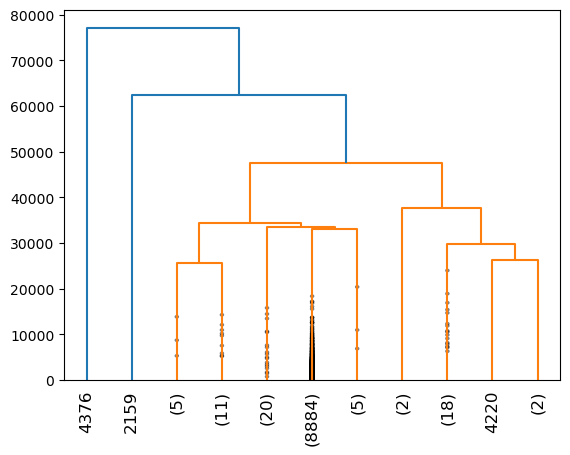

In [28]:
Z4 = linkage(data, method="average", metric="euclidean")

dendrogram(
    Z4,
    truncate_mode="lastp",  
    p=11,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)

plt.show()

In [29]:
pdistances = pdist(data, metric = "euclidean")
cophenet_coef = np.corrcoef(pdistances, cophenet(Z4))[0,1]
print("Cophenetic correlation:", cophenet_coef)

Cophenetic correlation: 0.9210151375038887


The same situation as it was with method="single" and method="complete".

> As a result, we have a cluster containing all but one point and a cluster containing one point. There is no sense in even counting the cophenetic coefficient, this linkage algorithm is not good for this dataset.

### Choosing the best model
1. Custom implementation of the KMeans algorithm
2. KMeans from library
3. Herarchical clustering

* Using the function `silhouette` I'll try to find the best model.

In [30]:
from scipy.cluster.hierarchy import fcluster

Z = linkage(data, method="ward", metric="euclidean")
cluster_2 = fcluster(Z, 2, criterion="maxclust")
cluster_3 = fcluster(Z, 3, criterion="maxclust")

from sklearn.metrics import silhouette_score

print("Silhouette evaluation of model Hierarchical clustering with 2 clusters:", silhouette_score(data, cluster_2))
print("Silhouette evaluation of model Hierarchical clustering with 3 clusters:", silhouette_score(data, cluster_3))

Silhouette evaluation of model Hierarchical clustering with 2 clusters: 0.3837402014998471
Silhouette evaluation of model Hierarchical clustering with 3 clusters: 0.38826577111436034


In [31]:
kmeans_2 = KMeans(n_clusters = 2, random_state = rd_seed).fit(data)
kmeans_3 = KMeans(n_clusters = 3, random_state = rd_seed).fit(data)

print("Silhouette evaluation of model KMeans with 2 clusters:", silhouette_score(data, kmeans_2.labels_))
print("Silhouette evaluation of model KMeans with 3 clusters:", silhouette_score(data, kmeans_3.labels_))

Silhouette evaluation of model KMeans with 2 clusters: 0.5116774583476609
Silhouette evaluation of model KMeans with 3 clusters: 0.4676551448676235


In [32]:
custom_2 = custom_kmeans(n_clusters = 2, random_state = rd_seed)
custom_2.fit(data)
custom_3 = custom_kmeans(n_clusters = 3, random_state = rd_seed)
custom_3.fit(data)

print("Silhouette evaluation of custom implementation of KMeans with 2 clusters:", silhouette_score(data, custom_2.labels_))
print("Silhouette evaluation of custom implementation of KMeans with 3 clusters:", silhouette_score(data, custom_3.labels_))

Silhouette evaluation of custom implementation of KMeans with 2 clusters: 0.5145025569999819
Silhouette evaluation of custom implementation of KMeans with 3 clusters: 0.4654260710800439


* I'll try to use these methods after data `standardization`

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [34]:
Z = linkage(data_scaled, method = "ward", metric = "euclidean")
cluster_2 = fcluster(Z, 2, criterion="maxclust" )
print("Silhouette evaluation of model Hierarchical clustering with 2 clusters:", silhouette_score(data_scaled, cluster_2))

Silhouette evaluation of model Hierarchical clustering with 2 clusters: 0.1775448235536517


In [35]:
kmeans = KMeans(n_clusters = 2, random_state = rd_seed ).fit(data_scaled)
print("Silhouette evaluation of model KMeans with 2 clusters:", silhouette_score(data_scaled, kmeans.labels_))

Silhouette evaluation of model KMeans with 2 clusters: 0.20959025073067575


#### Best model: According to `silhouette evaluation`, the best model is KMeans with 2 clusters (as above, where I was looking at the silhouette score).

### Interpretation of the Resulting clusters

In [36]:
# Divide dataset into two clusters
cluster_2

array([2, 2, 1, ..., 2, 2, 2], dtype=int32)

In [37]:
first_cluster = pd.DataFrame([data.loc[0]])
second_cluster = pd.DataFrame([data.loc[1]])
for i, cluster_index in enumerate(cluster_2):
    if (i > 1):
        if cluster_index == 1:
            first_cluster = first_cluster.append(data.loc[i], ignore_index = True)
        else:
            second_cluster = second_cluster.append(data.loc[i], ignore_index = True)

* Statistics of each cluster.

In [38]:
display(first_cluster.describe())
display(second_cluster.describe())
print('\n')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000
mean,1421.111900,0.977634,2094.814416,1223.557306,871.576087,422.942320,0.879076,0.397396,0.683180,0.073929,1.743785,31.424686,5107.395836,2200.393297,754.198592,0.240800,11.957005
std,1910.849376,0.073413,3073.994913,2485.958208,1285.170116,1116.041280,0.176752,0.369763,0.356545,0.152313,4.577962,32.805040,3834.879287,3232.360819,1306.433269,0.350317,0.262030
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,2.891346,0.000000,6.000000
25%,166.241597,1.000000,558.230000,0.000000,206.165000,0.000000,0.833333,0.000000,0.416667,0.000000,0.000000,12.000000,2000.000000,624.804026,176.214066,0.000000,12.000000
50%,750.150798,1.000000,1227.930000,495.430000,500.000000,0.000000,1.000000,0.333333,0.833333,0.000000,0.000000,21.000000,4000.000000,1296.041874,270.085264,0.000000,12.000000
75%,1905.602805,1.000000,2473.350000,1450.365000,1091.535000,175.821233,1.000000,0.750000,1.000000,0.083333,1.000000,37.000000,7000.000000,2522.051598,843.347037,0.416667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,18621.013310,1.000000,12.000000


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000,5531.000000
mean,1653.094942,0.815231,328.423932,202.309174,126.403323,1322.519737,0.250059,0.081956,0.167406,0.172985,4.179172,4.377509,4115.555273,1444.312565,932.208202,0.099883,11.245525
std,2175.816302,0.278234,595.841559,490.356645,300.721782,2457.281875,0.300359,0.146655,0.274614,0.216151,7.755782,7.433439,3458.239454,2624.320768,2778.992036,0.234547,1.631770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,91.550815,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,299.092188,158.945869,0.000000,12.000000
50%,945.793928,1.000000,102.000000,0.000000,0.000000,244.694657,0.100000,0.000000,0.000000,0.083333,1.000000,2.000000,3000.000000,639.362373,375.333662,0.000000,12.000000
75%,2175.678828,1.000000,399.970000,170.960000,129.140000,1694.074969,0.416667,0.083333,0.250000,0.250000,5.000000,6.000000,6000.000000,1480.906465,864.206542,0.083333,12.000000
max,16304.889250,1.000000,8533.540000,6678.260000,7739.480000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,162.000000,23000.000000,40627.595240,76406.207520,1.000000,12.000000


Observing the data, it appears that the second cluster has higher mean values for each feature. One potential explanation for this is that the first group is larger, making the sample more stable. However, the first quantile, median, third quantile, and maximum values for the second cluster are also greater in almost all columns, indicating that the higher mean values are not just a result of the group being larger, but rather due to the characteristics of the group itself. This suggests that the second cluster contains more active users. Examining specific features, we see that the average values for the number of purchases made and amount of payment made by users are four times higher in the second cluster compared to the first. The same pattern is observed with cash paid in advance. Additionally, the average maximum purchase amount made in a single transaction is six times higher in the second cluster. The credit limit for the second cluster is also significantly higher. These observations may suggest that the second group includes private entrepreneurs, who typically have higher credit limits and make larger payments.

### In total

In summary, it seems that credit card users can be divided into two groups: an average group and a more active group. The second group has higher levels of activity, with more payments made and larger payment amounts, as well as higher credit limits. It is likely that the second group includes a greater number of entrepreneurs, who tend to have more activity on their cards.